In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tvenkatesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
sms = pd.read_csv('labeled_data.csv')
sms.keys()

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'target', 'tweet'],
      dtype='object')

In [6]:
df=sms.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],axis=1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.keys()

Index(['target', 'tweet'], dtype='object')

In [10]:
df.shape

(24783, 2)

In [11]:
df['target'].value_counts()

1    19190
2     4163
0     1430
Name: target, dtype: int64

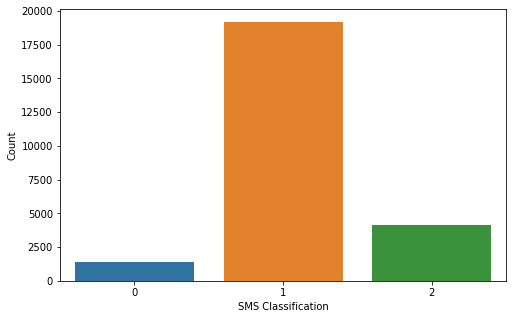

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='target', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

In [13]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.tweet[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(df['target'])
y = y.iloc[:, 1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

c:\Users\tvenkatesh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Accuracy score for alpha=0.0 is: 88.72%
Accuracy score for alpha=0.1 is: 88.9%
Accuracy score for alpha=0.2 is: 88.88%
Accuracy score for alpha=0.3 is: 88.94%
Accuracy score for alpha=0.4 is: 88.97%
Accuracy score for alpha=0.5 is: 89.03%
Accuracy score for alpha=0.6 is: 89.03%
Accuracy score for alpha=0.7 is: 89.05%
Accuracy score for alpha=0.8 is: 89.01%
Accuracy score for alpha=0.9 is: 88.99%
Accuracy score for alpha=1.0 is: 89.09%
--------------------------------------------
The best accuracy is 89.09% with alpha value as 1.0


In [17]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [20]:
result = ['Wait a minute, this is a abusive!','Ohhh, this is a normal message.']

In [21]:
msg = " You Bitchh!! "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a abusive!
